In [ ]:
import tensorflow as tf
import os
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_path='/content/drive/MyDrive/dt_2'
train_path='/content/drive/MyDrive/dt_2/train'
train_normal_path='/content/drive/MyDrive/dt_2/train/Normal'
train_osteoporosis_path='/content/drive/MyDrive/dt_2/train/Osteoporosis'
validation_path='/content/drive/MyDrive/dt_2/val'
validation_normal_path='/content/drive/MyDrive/dt_2/val/Normal'
validation_osteoporosis_path='/content/drive/MyDrive/dt_2/val/Osteoporosis'
test_path='/content/drive/MyDrive/dt_2/test'
test_normal_path='/content/drive/MyDrive/dt_2/test/Normal'
test_osteoporosis_path='/content/drive/MyDrive/dt_2/test/Osteoporosis'


In [ ]:
#Number of images in train and test files in dataset
train_normal_length=len(os.listdir(train_normal_path))
train_osteo_length=len(os.listdir(train_osteoporosis_path))
val_normal_length=len(os.listdir(validation_normal_path))
val_osteo_length=len(os.listdir(validation_osteoporosis_path))
test_normal_length=len(os.listdir(test_normal_path))
test_osteo_length=len(os.listdir(test_osteoporosis_path))
train_normal_length,train_osteo_length,val_normal_length,val_osteo_length,test_normal_length,test_osteo_length


(749, 616, 214, 176, 108, 89)

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_path)
class_names=np.array([item.name for item in data_dir.glob('*')])
print(class_names)

['Normal' 'Osteoporosis']


In [ ]:
#visualization of our dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def get_random_img(target_dir,target_class):
  target_folder=target_dir+'/'+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img,cmap="gray")
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") 

  return img

Image shape: (224, 224)


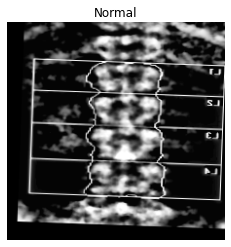

In [ ]:
normal_image_1=get_random_img(target_dir=train_path,target_class=class_names[0])


Image shape: (224, 224)


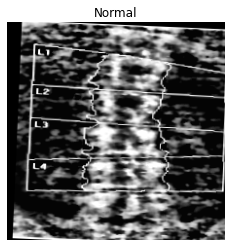

In [ ]:
normal_image_2=get_random_img(target_dir=train_path,target_class=class_names[0])

Image shape: (224, 224)


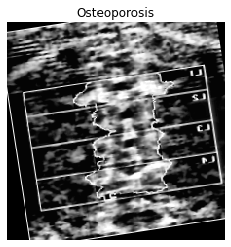

In [ ]:
osteo_img=get_random_img(target_dir=test_path,target_class=class_names[1])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True) 
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_path,
                                               batch_size=32,
                                               color_mode='grayscale',
                                               target_size=(224, 224),
                                               class_mode="binary", 
                                               seed=42,
                                               )

valid_data = valid_datagen.flow_from_directory(validation_path,
                                               batch_size=32,
                                               color_mode='grayscale',
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               
                                               )

Found 1365 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


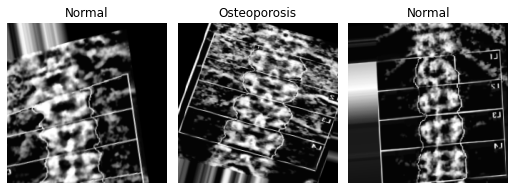

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 3):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]        
        dic = {0:'Normal', 1:'Osteoporosis'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray')
        break
plt.tight_layout()
plt.show()

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255.)
test_data=test_datagen.flow_from_directory(test_path,
                                               batch_size=16,
                                               color_mode='grayscale',
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                           shuffle=False,
                                           
                                               )

Found 197 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation,Dropout,GlobalAveragePooling2D
from tensorflow.keras import Sequential

In [ ]:
img_width=224
img_height=224
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3),strides=1, activation="relu", input_shape=(img_width, img_height, 1)))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Flatten())

model_1.add(Dense(activation = 'relu', units = 64))
model_1.add(Dense(activation = 'relu', units = 32))
model_1.add(Dense(activation = 'sigmoid', units = 1))



In [ ]:
model_1.compile(loss="binary_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(train_data.classes), 
    y=train_data.classes)
cw = dict(zip( np.unique(train_data.classes), weights))
print(cw)

{0: 0.9112149532710281, 1: 1.1079545454545454}


In [ ]:
history_1=model_1.fit(train_data,
                      epochs=25,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks=callbacks_list,
                      class_weight=cw)

Epoch 1/25
43/43 [==============================] - 14s 305ms/step - loss: 0.6946 - accuracy: 0.5304 - val_loss: 0.6913 - val_accuracy: 0.5154 - lr: 0.0010
Epoch 2/25
43/43 [==============================] - 13s 294ms/step - loss: 0.6816 - accuracy: 0.5890 - val_loss: 0.6282 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 3/25
43/43 [==============================] - 13s 296ms/step - loss: 0.6588 - accuracy: 0.6147 - val_loss: 0.6801 - val_accuracy: 0.4641 - lr: 0.0010
Epoch 4/25
43/43 [==============================] - 13s 291ms/step - loss: 0.6370 - accuracy: 0.6513 - val_loss: 0.5469 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 5/25
43/43 [==============================] - 13s 293ms/step - loss: 0.6077 - accuracy: 0.6740 - val_loss: 0.5121 - val_accuracy: 0.7590 - lr: 0.0010
Epoch 6/25
43/43 [==============================] - 15s 335ms/step - loss: 0.5822 - accuracy: 0.7062 - val_loss: 0.5263 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 7/25
43/43 [==============================] - 13s 296ms/st

In [ ]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 26, 26, 32)      

In [ ]:
model_1.evaluate(test_data)

13/13 [==============================] - 65s 5s/step - loss: 0.1297 - accuracy: 0.9645


[0.1296727955341339, 0.9644669890403748]

In [ ]:
import pandas as pd
def plot_loss_curves(history):
 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend();

  

In [ ]:
def plot_accuracy_curves(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

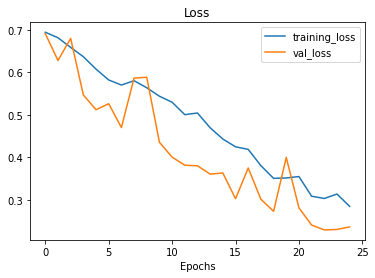

In [ ]:
plot_loss_curves(history_1)

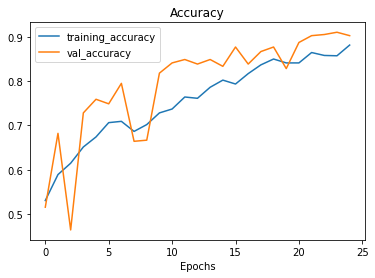

In [ ]:
plot_accuracy_curves(history_1)

In [ ]:
preds = model_1.predict(test_data,verbose=1)

13/13 [==============================] - 1s 65ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.53] = 0
predictions[predictions > 0.53] = 1

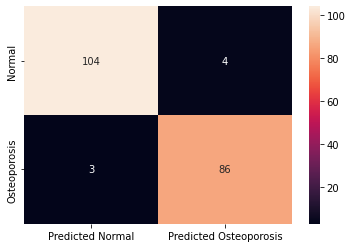

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test_data.classes, predictions, labels=[0, 1]),index=[ "Normal", "Osteoporosis"],
columns=["Predicted Normal", "Predicted Osteoporosis"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test_data.classes,y_pred=predictions,target_names =['NORMAL','Osteoporosis']))

              precision    recall  f1-score   support

      NORMAL       0.97      0.96      0.97       108
Osteoporosis       0.96      0.97      0.96        89

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



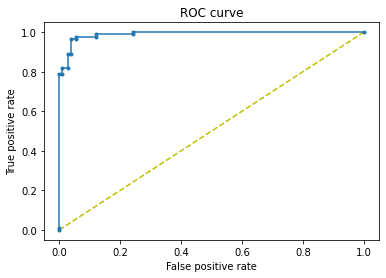

In [ ]:
y_test=test_data.classes
from sklearn.metrics import roc_curve
y_preds = model_1.predict(test_data).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  8    0.533035
Name: thresholds, dtype: float32


In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.990220557636288


In [ ]:
model_1.save("Osteoporosis_model.h5")

In [ ]:
from keras.models import load_model
path='/content/drive/MyDrive/Osteoporosis_model/Osteoporosis_model.h5'
model = load_model(path)

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 1s 78ms/step - loss: 0.1297 - accuracy: 0.9645


[0.1296727955341339, 0.9644669890403748]